- Use this notebook to train your selfie detector. In 'selfie-capture' notebook, we will use the best trained model to capture our selfies.

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Cloning into 'yolov5'...
remote: Enumerating objects: 15661, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 15661 (delta 138), reused 176 (delta 101), pack-reused 15393
Receiving objects: 100% (15661/15661), 14.60 MiB | 21.14 MiB/s, done.
Resolving deltas: 100% (10667/10667), done.
/home/erkara/Dropbox/Teaching/Intro2DeepLearning/Intro2-Deep-Learning-with-Pytorch/projects/selfie_detector/yolov5
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 2.0.0+cu117 (NVIDIA GeForce RTX 2070 Super)


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="pmVVllkKlvhJaFdCMBoi")
project = rf.workspace("emotiondetection-bkn0e").project("selfie-capture")
dataset = project.version(2).download("yolov5",location='selfie-data')

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to selfie-data in yolov5pytorch:: 100%|███████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 9672.83it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [4]:
!python train.py --img 640 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --exist-ok

train: weights=yolov5s.pt, cfg=, data=/home/erkara/Dropbox/Teaching/Intro2DeepLearning/Intro2-Deep-Learning-with-Pytorch/projects/selfie_detector/yolov5/selfie-data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-166-g54e9515 Python-3.11.2 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7982MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, war

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/home/erkara/Dropbox/Teaching/Intro2DeepLearning/Intro2-Deep-Learning-with-Pytorch/projects/selfie_detector/yolov5/selfie-data/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-166-g54e9515 Python-3.11.2 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 2070 Super, 7982MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /home/erkara/Dropbox/Teaching/Intro2DeepLearning/Intro2-Deep-Learning-with-Pytorch/projects/selfie_detector/yolov5/selfie-data/test/images/20230425_194127_jpg.rf.a4879a4f04a2509c826d948f3a7284d1.jpg

In [12]:
#now you can look up some results inside "yolov5/runs/detect/exp" folder
image_list = []
result_dir = "runs/detect/exp"
for filename in os.listdir(result_dir):
    if filename.endswith('.jpg'):
        image_list.append(os.path.join(result_dir,filename)) 

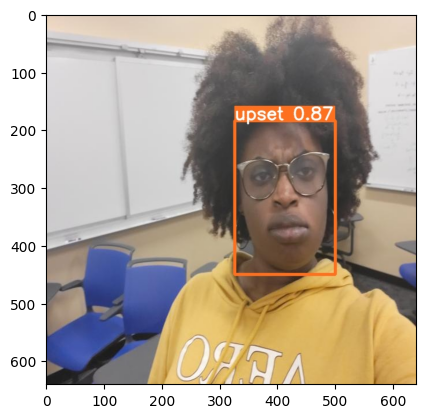

In [17]:
import matplotlib.pyplot as plt
img = plt.imread(image_list[12])
plt.imshow(img)
plt.show()